In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
january = pd.read_csv("Sales_January_2019.csv")
february = pd.read_csv("Sales_February_2019.csv")
march = pd.read_csv("Sales_March_2019.csv")

In [4]:
q1 = pd.concat([january,february,march],axis=0)

<AxesSubplot:>

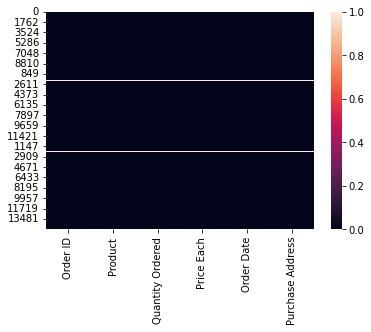

In [5]:
sns.heatmap(data=pd.isnull(q1))

In [6]:
q1 = q1.dropna()

In [7]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36890 entries, 0 to 15225
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          36890 non-null  object
 1   Product           36890 non-null  object
 2   Quantity Ordered  36890 non-null  object
 3   Price Each        36890 non-null  object
 4   Order Date        36890 non-null  object
 5   Purchase Address  36890 non-null  object
dtypes: object(6)
memory usage: 2.0+ MB


In [8]:
q1['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', 'Quantity Ordered', '6'],
      dtype=object)

In [9]:
filter = q1['Quantity Ordered'] != 'Quantity Ordered'
q1 = q1[filter]

In [10]:
q1['Quantity Ordered'].unique()

array(['1', '2', '3', '5', '4', '7', '6'], dtype=object)

In [11]:
q1['city'] = q1['Purchase Address'].str.split(", ",expand=True)[1]


In [12]:
q1['state'] = q1['Purchase Address'].str.split(", ",expand=True)[2].str.split(" ", expand=True)[0]

In [13]:
q1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,state
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,TX
...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",San Francisco,CA
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",San Francisco,CA
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",Los Angeles,CA
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",San Francisco,CA


In [14]:
q1['month'] = q1['Order Date'].str[0:2]
q1['year'] = q1['Order Date'].str[6:8]
q1['time'] = q1['Order Date'].str[-6:-3]
q1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,state,month,year,time
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",Boston,MA,01,19,21
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",Portland,OR,01,19,14
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",San Francisco,CA,01,19,13
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",Los Angeles,CA,01,19,20
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",Austin,TX,01,19,11
...,...,...,...,...,...,...,...,...,...,...,...
15221,176554,Lightning Charging Cable,1,14.95,03/24/19 11:14,"672 12th St, San Francisco, CA 94016",San Francisco,CA,03,19,11
15222,176555,27in FHD Monitor,1,149.99,03/22/19 20:27,"42 4th St, San Francisco, CA 94016",San Francisco,CA,03,19,20
15223,176556,AAA Batteries (4-pack),3,2.99,03/14/19 10:29,"871 7th St, Los Angeles, CA 90001",Los Angeles,CA,03,19,10
15224,176557,iPhone,1,700,03/30/19 12:32,"83 Washington St, San Francisco, CA 94016",San Francisco,CA,03,19,12


In [42]:
filter = q1['month'] != 4
q1 = q1[filter]

In [16]:
q1['Quantity Ordered'] = pd.to_numeric(q1['Quantity Ordered'])
q1['Price Each'] = pd.to_numeric(q1['Price Each'])
q1['month'] = pd.to_numeric(q1['month'])
q1['year'] = pd.to_numeric(q1['year'])
q1['time'] = pd.to_numeric(q1['time'])
q1['Order Date'] = pd.to_datetime(q1['Order Date'])

In [17]:
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36821 entries, 0 to 15225
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          36821 non-null  object        
 1   Product           36821 non-null  object        
 2   Quantity Ordered  36821 non-null  int64         
 3   Price Each        36821 non-null  float64       
 4   Order Date        36821 non-null  datetime64[ns]
 5   Purchase Address  36821 non-null  object        
 6   city              36821 non-null  object        
 7   state             36821 non-null  object        
 8   month             36821 non-null  int64         
 9   year              36821 non-null  int64         
 10  time              36821 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 3.4+ MB


Number of products sold in each month

In [46]:
product_count = q1.groupby('month').count()
product_count

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,state,year,time
month,,,,,,,,,,
1,9675,9675,9675,9675,9675,9675,9675,9675,9675,9675
2,11975,11975,11975,11975,11975,11975,11975,11975,11975,11975
3,15153,15153,15153,15153,15153,15153,15153,15153,15153,15153


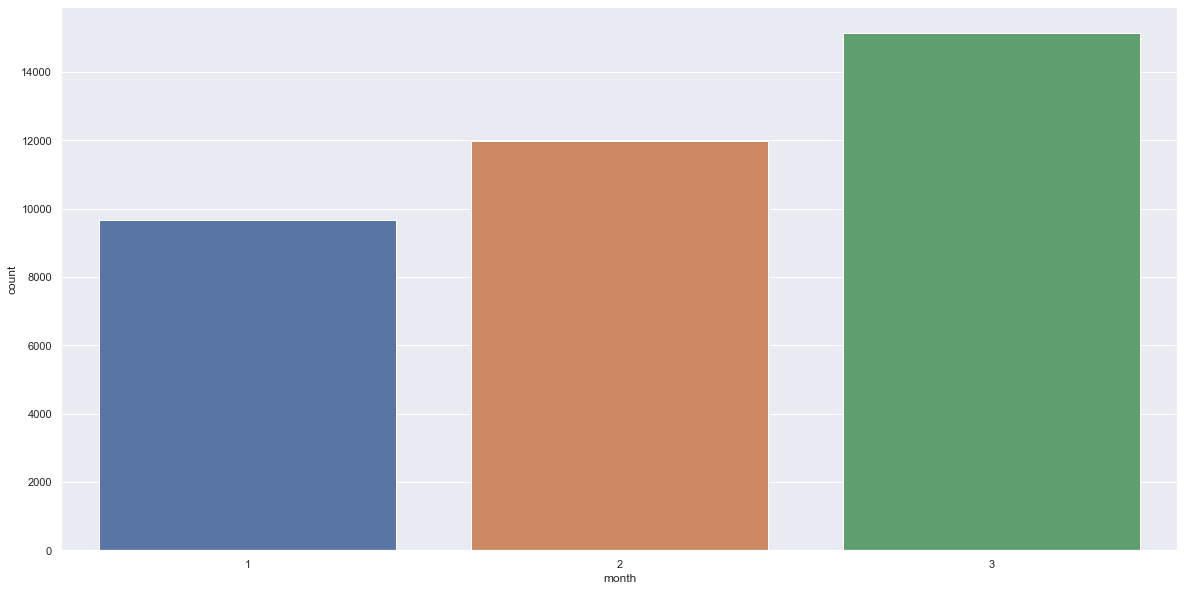

In [43]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(
    data=q1,
    x = 'month'
)
plt.show()

Amount of money brought in by month

In [47]:
price_count = q1.groupby('month').sum()
price_count

,Quantity Ordered,Price Each,year,time
month,,,,
1,10862,1803264.98,183825,139433
2,13449,2188884.72,227525,172669
3,17005,2791207.83,287907,218969


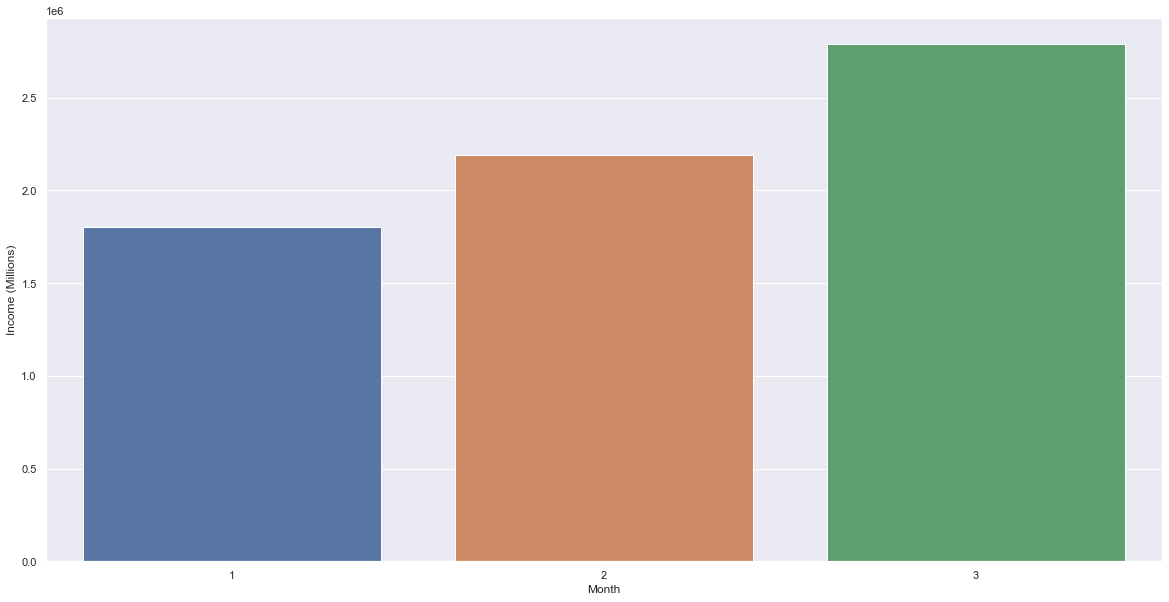

In [48]:
ax = sns.barplot(
    data = price_count.reset_index(),
    x = 'month',
    y = 'Price Each'
)
ax.set(xlabel='Month', ylabel='Income (Millions)')
plt.show()

Prices Of the different products

In [22]:
product_price = q1[['Product','Price Each']].drop_duplicates(subset=['Product','Price Each'])
product_price

,Product,Price Each
0,iPhone,700.00
1,Lightning Charging Cable,14.95
2,Wired Headphones,11.99
3,27in FHD Monitor,149.99
5,AAA Batteries (4-pack),2.99
6,27in 4K Gaming Monitor,389.99
7,USB-C Charging Cable,11.95
8,Bose SoundSport Headphones,99.99
9,Apple Airpods Headphones,150.00
11,Macbook Pro Laptop,1700.00


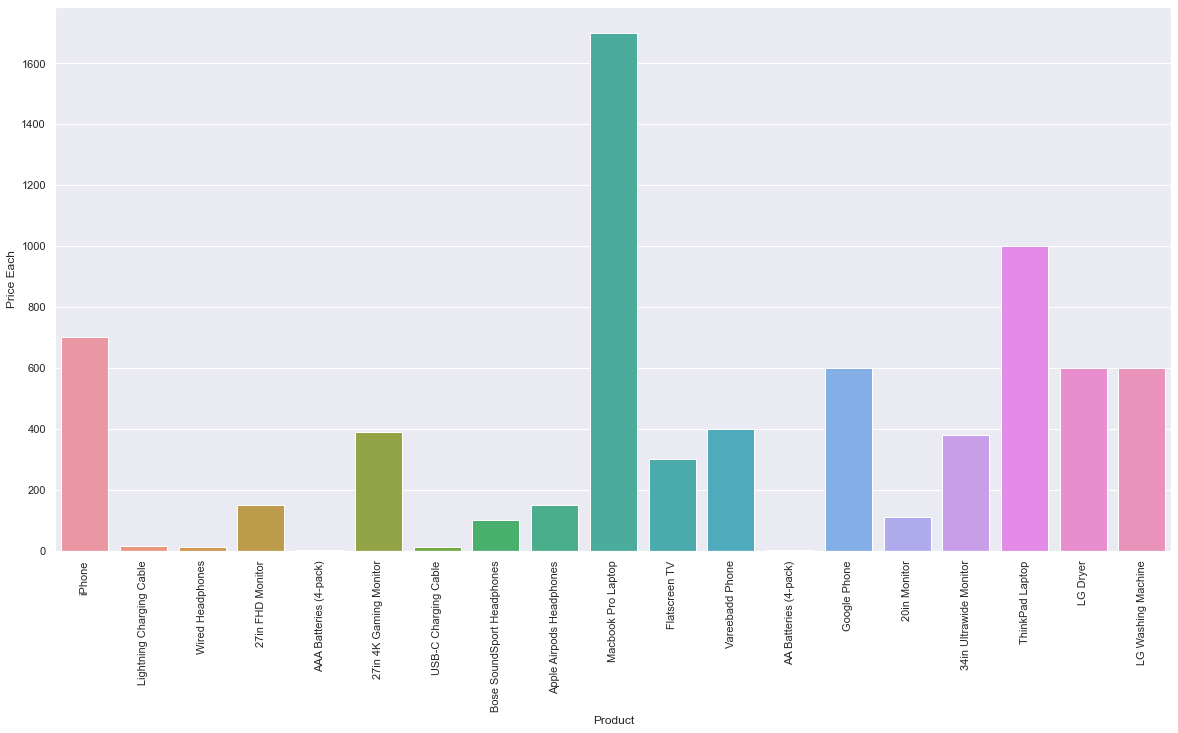

In [23]:
sns.barplot(
    data=product_price,
    x = 'Product',
    y = 'Price Each'
)
plt.xticks(rotation=90)
plt.show()

Number of each product sold

In [24]:
q1.groupby("Product").count()[['Order ID']]

,Order ID
Product,
20in Monitor,782
27in 4K Gaming Monitor,1216
27in FHD Monitor,1496
34in Ultrawide Monitor,1252
AA Batteries (4-pack),3990
AAA Batteries (4-pack),4051
Apple Airpods Headphones,3132
Bose SoundSport Headphones,2673
Flatscreen TV,915


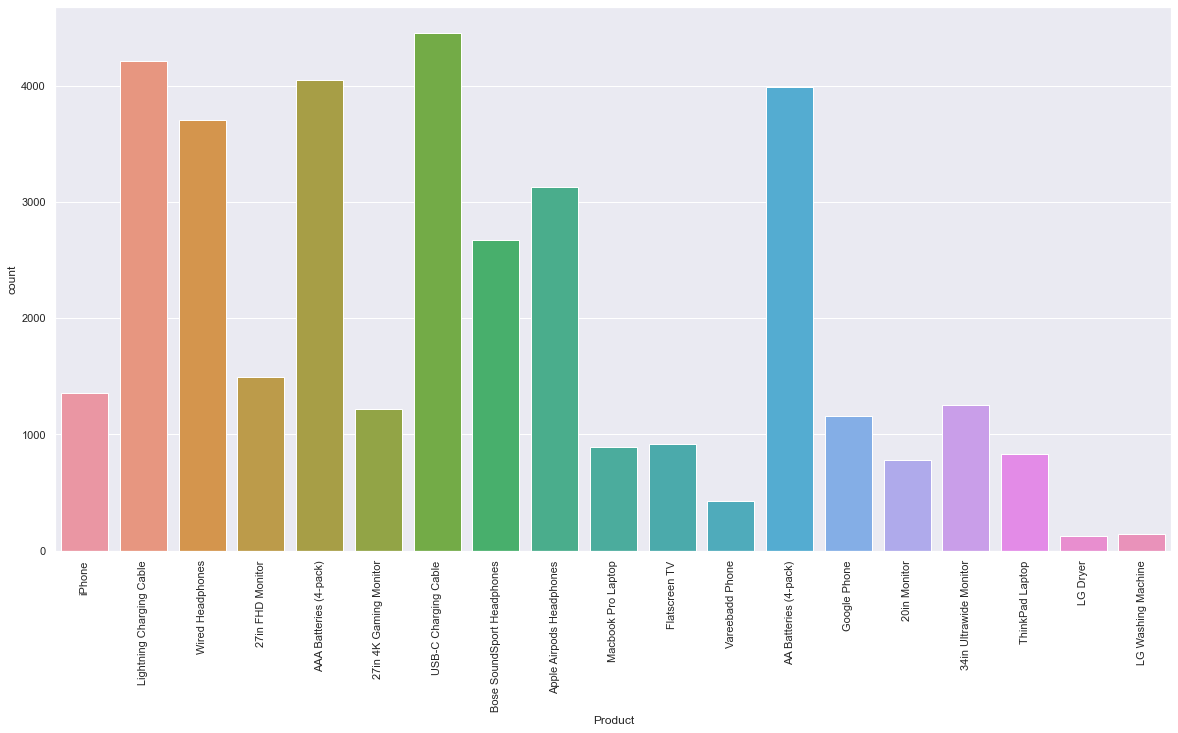

In [49]:
sns.countplot(
    data= q1,
    x = 'Product'
)
plt.xticks(rotation=90)
plt.show()

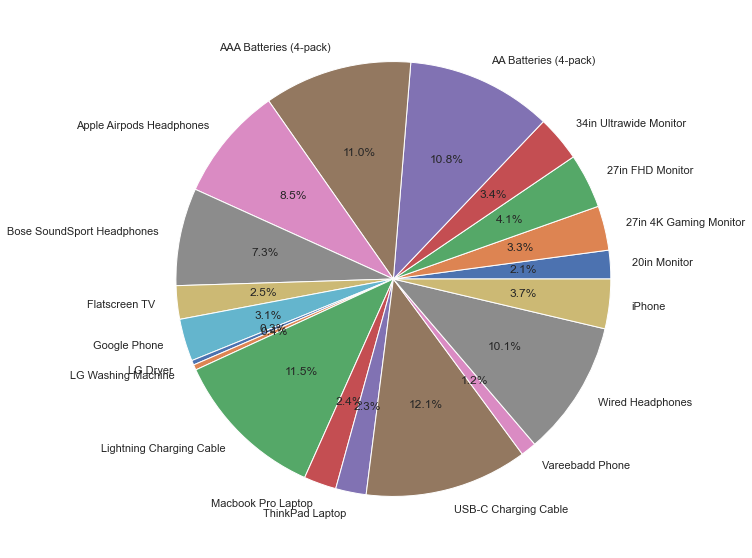

In [56]:
pie = q1.groupby("Product").count()['Order ID']
plt.pie(pie,labels = pie.index, autopct="%1.1f%%")
plt.show()

Sales of each product by city

In [26]:
q1.groupby(['city','Product']).count()

Order ID  Quantity Ordered  Price Each  \
city    Product                                                          
Atlanta 20in Monitor                  64                64          64   
        27in 4K Gaming Monitor        81                81          81   
        27in FHD Monitor             103               103         103   
        34in Ultrawide Monitor       105               105         105   
        AA Batteries (4-pack)        320               320         320   
...                                  ...               ...         ...   
Seattle ThinkPad Laptop               68                68          68   
        USB-C Charging Cable         337               337         337   
        Vareebadd Phone               36                36          36   
        Wired Headphones             290               290         290   
        iPhone                       109               109         109   

                                Order Date  Purchase Address  state  month  \
city    Product                                                              
Atlanta 20in Monitor                    64                64     64     64   
        27in 4K Gaming Monitor          81                81     81     81   
        27in FHD Monitor               103               103    103    103   
        34in Ultrawide Monitor         105               105    105    105   
        AA Batteries (4-pack)          320               320    320    320   
...                                    ...               ...    ...    ...   
Seattle ThinkPad Laptop                 68                68     68     68   
        USB-C Charging Cable           337               337    337    337   
        Vareebadd Phone                 36                36     36     36   
        Wired Headphones               290               290    290    290   
        iPhone                         109               109    109    109   

                                year  time  
city    Product                             
Atlanta 20in Monitor              64    64  
        27in 4K Gaming Monitor    81    81  
        27in FHD Monitor         103   103  
        34in Ultrawide Monitor   105   105  
        AA Batteries (4-pack)    320   320  
...                              ...   ...  
Seattle ThinkPad Laptop           68    68  
        USB-C Charging Cable     337   337  
        Vareebadd Phone           36    36  
        Wired Headphones         290   290  
        iPhone                   109   109  

[171 rows x 9 columns]

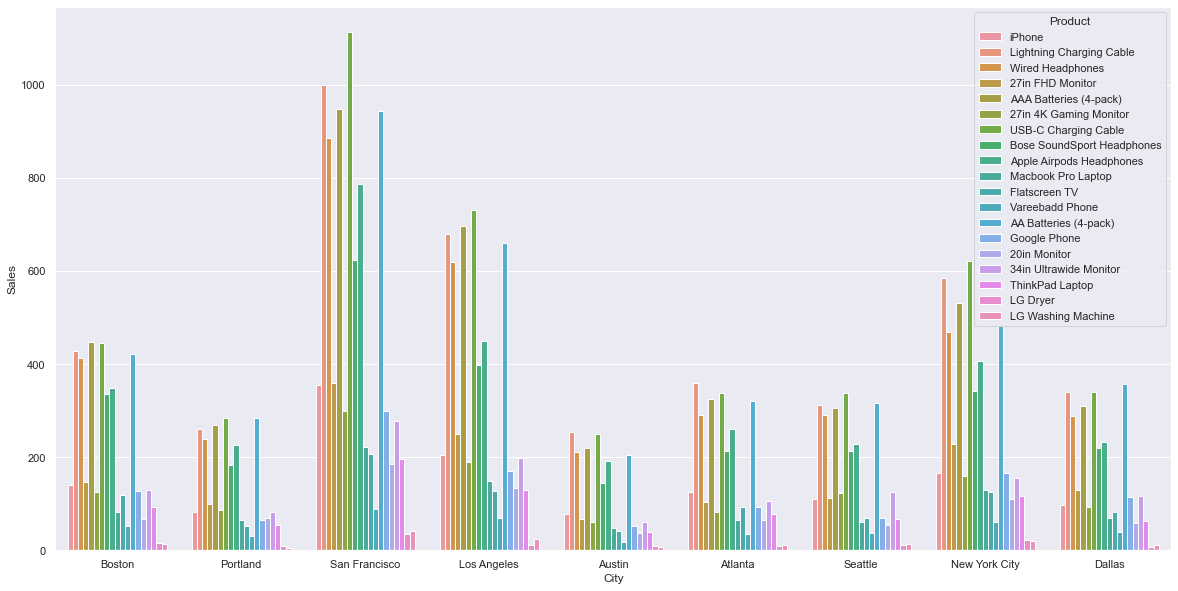

In [51]:
ax = sns.countplot(
    data=q1,
    x = 'city',
    hue = 'Product'
)
ax.set(xlabel='City', ylabel='Sales')
plt.show()

<AxesSubplot:xlabel='city', ylabel='Order ID'>

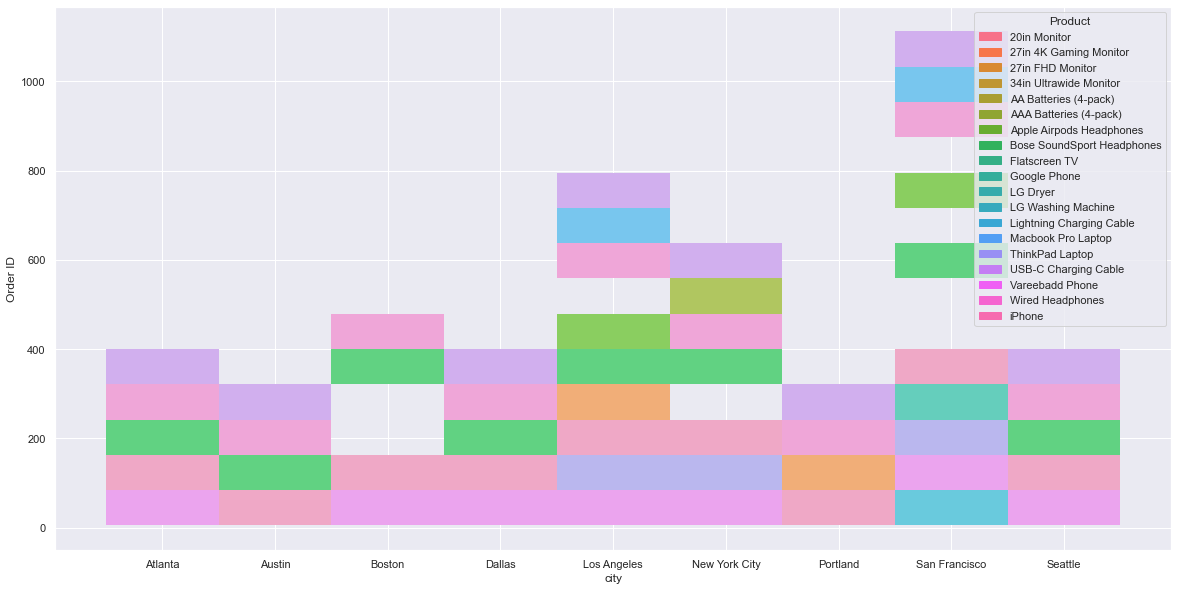

In [40]:
sns.histplot(
    data=q1.groupby(['city','Product']).count().reset_index(),
    x='city',
    y = 'Order ID',
    hue='Product'
)

Sales of each product by state

In [28]:
q1.groupby(['state','Product']).count()

Order ID  Quantity Ordered  Price Each  \
state Product                                                          
CA    20in Monitor                 318               318         318   
      27in 4K Gaming Monitor       488               488         488   
      27in FHD Monitor             609               609         609   
      34in Ultrawide Monitor       477               477         477   
      AA Batteries (4-pack)       1603              1603        1603   
...                                ...               ...         ...   
WA    ThinkPad Laptop               68                68          68   
      USB-C Charging Cable         337               337         337   
      Vareebadd Phone               36                36          36   
      Wired Headphones             290               290         290   
      iPhone                       109               109         109   

                              Order Date  Purchase Address  city  month  year  \
state Product                                                                   
CA    20in Monitor                   318               318   318    318   318   
      27in 4K Gaming Monitor         488               488   488    488   488   
      27in FHD Monitor               609               609   609    609   609   
      34in Ultrawide Monitor         477               477   477    477   477   
      AA Batteries (4-pack)         1603              1603  1603   1603  1603   
...                                  ...               ...   ...    ...   ...   
WA    ThinkPad Laptop                 68                68    68     68    68   
      USB-C Charging Cable           337               337   337    337   337   
      Vareebadd Phone                 36                36    36     36    36   
      Wired Headphones               290               290   290    290   290   
      iPhone                         109               109   109    109   109   

                              time  
state Product                       
CA    20in Monitor             318  
      27in 4K Gaming Monitor   488  
      27in FHD Monitor         609  
      34in Ultrawide Monitor   477  
      AA Batteries (4-pack)   1603  
...                            ...  
WA    ThinkPad Laptop           68  
      USB-C Charging Cable     337  
      Vareebadd Phone           36  
      Wired Headphones         290  
      iPhone                   109  

[152 rows x 9 columns]

<AxesSubplot:xlabel='state', ylabel='count'>

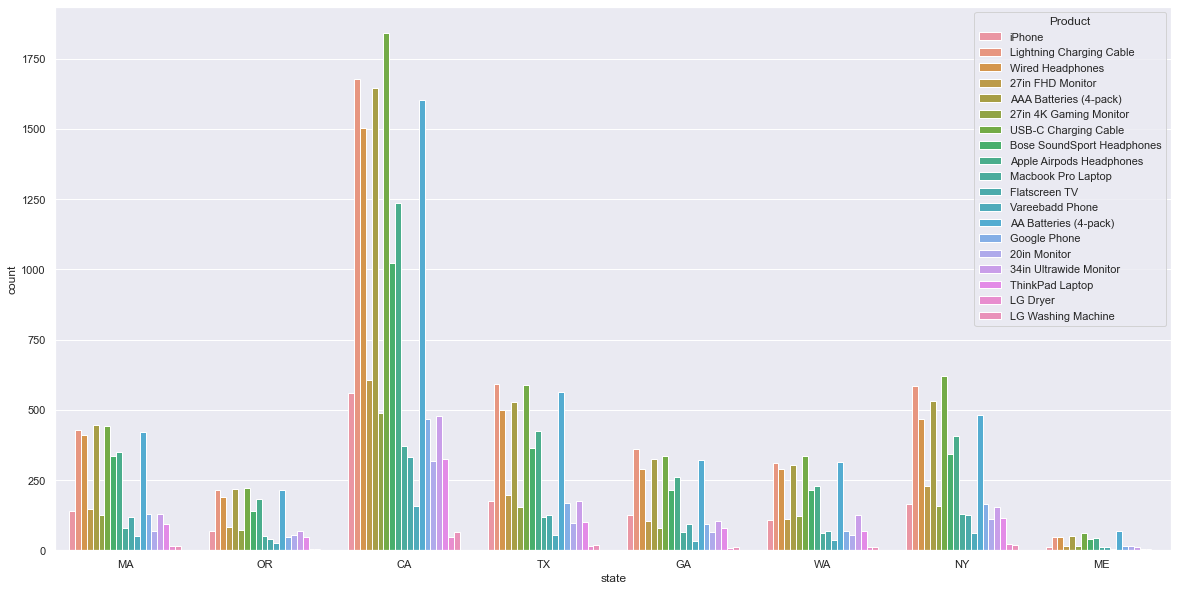

In [52]:
sns.countplot(
    data=q1,
    x = 'state',
    hue = 'Product'
)

products sold by time

In [30]:
q1['time'].unique()

array([21, 14, 13, 20, 11, 12, 10, 18, 19, 17,  8,  9,  0, 22, 23, 16,  7,
       15,  1,  2,  5,  6,  3,  4], dtype=int64)

In [31]:
q1.groupby('time').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,city,state,month,year
time,,,,,,,,,,
0,755,755,755,755,755,755,755,755,755,755
1,457,457,457,457,457,457,457,457,457,457
2,275,275,275,275,275,275,275,275,275,275
3,162,162,162,162,162,162,162,162,162,162
4,152,152,152,152,152,152,152,152,152,152
5,264,264,264,264,264,264,264,264,264,264
6,511,511,511,511,511,511,511,511,511,511
7,747,747,747,747,747,747,747,747,747,747
8,1231,1231,1231,1231,1231,1231,1231,1231,1231,1231


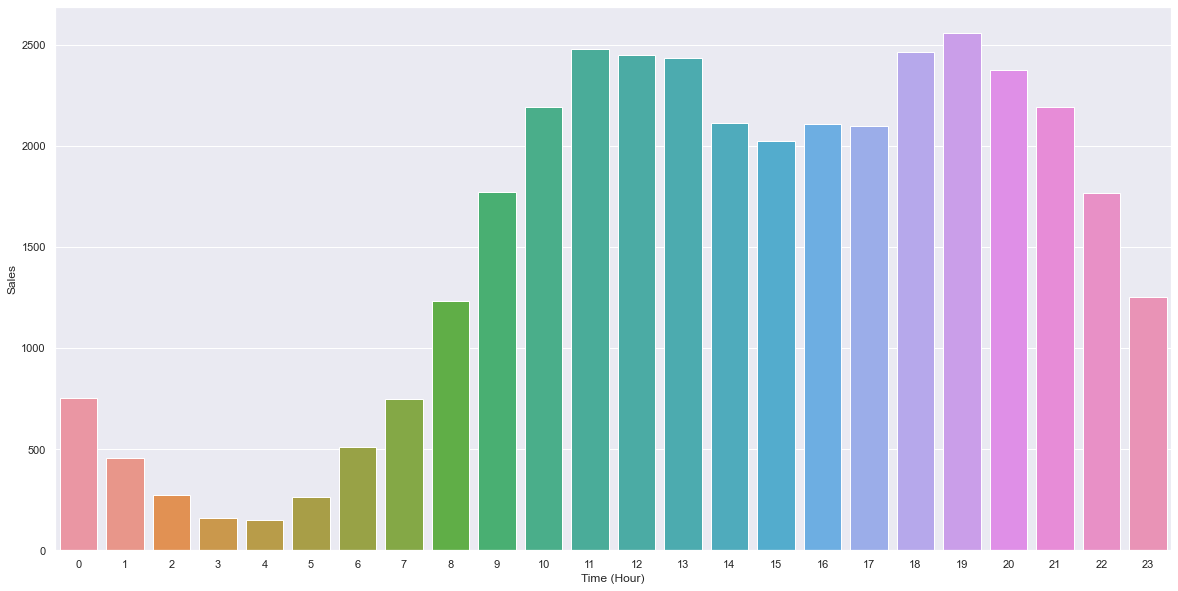

In [32]:
ax = sns.countplot(x=q1['time'])
ax.set(xlabel='Time (Hour)', ylabel='Sales')
plt.show()